<a href="https://colab.research.google.com/github/Hjhirp/Evaluation-Of-Car-Dataset-With-Multiple-Classifiers/blob/main/evaluation_of_car_dataset_with_multiple_classifers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


# Evaluation of Car dataset with Various Classifiers and Grid Search to Maximize Accuracy

In [ ]:
# importing datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
df = pd.read_csv("../input/car-evaluation-data-set/car_evaluation.csv",header=0)// kaggle dataset used
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
columns = ["Buy_price","mcost","ndoors","nop","lug_boot","safety","decision"]
df.columns = columns

In [ ]:
df.head()

X_list=["Buy_price","mcost","ndoors","nop","lug_boot","safety"]

X=df[X_list]
y=df.decision
y.value_counts()


unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [ ]:
df.shape

(1727, 7)

In [ ]:
X

,Buy_price,mcost,ndoors,nop,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [ ]:
# importing necessary package for encoding our categorial features
import category_encoders as ce

encoder_X = ce.OrdinalEncoder(cols=["Buy_price","mcost","ndoors","nop","lug_boot","safety"])
X= encoder_X.fit_transform(X)

encoder_Y = ce.OrdinalEncoder()
y=np.ravel(encoder_Y.fit_transform(y))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:

from sklearn import tree,svm,naive_bayes,neighbors,ensemble
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
#decision tree

from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, 12],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5]
}
dt_gs = GridSearchCV(tree.DecisionTreeClassifier(), param_grid = param_grid)
dt_gs.fit(X_train, y_train)
print("####### DECISION TREE #######")
print(dt_gs.best_params_)

#output
####### DECISION TREE #######
#{'criterion': 'entropy', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 2}

# random forest

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_gs = GridSearchCV(ensemble.RandomForestClassifier(), param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
rf_gs.fit(X_train, y_train)
print(" ####### RANDOM FOREST #######")
print(rf_gs.best_params_)

# output
 ####### RANDOM FOREST #######
# {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}

# support vector machines

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc_gs = GridSearchCV(svm.SVC(), param_grid2, refit = True, verbose = 3)
svc_gs.fit(X_train, y_train)
print(" ####### SVM #######")
print(svc_gs.best_params_)

#output
####### SVM #######
# {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

# knn

k_range = list(range(1, 31))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)
knn_gs = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),param_grid=param_grid,cv=5,return_train_score=True) # Turn on cv train scores
knn_gs.fit(X_train, y_train)
print("####### KNN ######")
print(knn_gs.best_params_)

#output
#{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
######## KNN ######
#{'n_neighbors': 7}

#

####### DECISION TREE #######
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 2}
Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   1.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_sam

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.6s


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min



[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   1.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   1.2s
[CV] bootstrap=True, max_depth=90, max_features=2

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min



[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fe

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.1min finished


 ####### RANDOM FOREST #######
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.705, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.705, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.748, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.764, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.751, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished


####### KNN ######
{'n_neighbors': 6}


In [ ]:
# Creating a dataframe to store accuracies
import pandas as pd
row_num = 0
compiler_compare = pd.DataFrame()

## Decision Tree

In [ ]:
y_pred = dt_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in decision tree is : {}".format(cas))
print("Confusion matrix for decision tree is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'Decision Tree'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.9735099337748344
Confusion matrix for decision tree is : 
[[262   4  18   3]
 [  5  44   0   0]
 [  2   0 835   0]
 [  0   0   0  35]]


In [ ]:
y_pred = dt_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in decision tree is : {}".format(cas))
print("Confusion matrix for decision tree is : ")
print(confusion_matrix(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.9325626204238922
Confusion matrix for decision tree is : 
[[107   4  17   6]
 [  2  17   0   0]
 [  6   0 339   0]
 [  0   0   0  21]]


## Random Forest

In [ ]:
y_pred = rf_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in Random Forest is : {}".format(cas))
print("Confusion matrix for Random Forest is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'Random Forest'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.9892384105960265
Confusion matrix for decision tree is : 
[[268   0  10   0]
 [  1  47   1   0]
 [  0   0 842   0]
 [  0   1   0  38]]


In [ ]:
y_pred = rf_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in Random Forest is : {}".format(cas))
print("Confusion matrix for Random Forest is : ")
print(confusion_matrix(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.9556840077071291
Confusion matrix for decision tree is : 
[[112   0  15   2]
 [  2  20   1   1]
 [  1   0 340   0]
 [  0   1   0  24]]


## SVM

In [ ]:
y_pred = svc_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in SVM is : {}".format(cas))
print("Confusion matrix for SVM is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'SVM'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.9991721854304636
Confusion matrix for decision tree is : 
[[269   0   1   0]
 [  0  48   0   0]
 [  0   0 852   0]
 [  0   0   0  38]]


In [ ]:
y_pred = svc_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in SVM is : {}".format(cas))
print("Confusion matrix for SVM is : ")
print(confusion_matrix(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.9865125240847784
Confusion matrix for decision tree is : 
[[115   1   5   0]
 [  0  20   0   1]
 [  0   0 351   0]
 [  0   0   0  26]]


## KNN

In [ ]:
y_pred = knn_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in KNN is : {}".format(cas))
print("Confusion matrix for KNN is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'KNN'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.9701986754966887
Confusion matrix for decision tree is : 
[[260   5  12   7]
 [  0  43   1   2]
 [  9   0 840   0]
 [  0   0   0  29]]


In [ ]:
y_pred = knn_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in KNN is : {}".format(cas))
print("Confusion matrix for KNN is : ")
print(confusion_matrix(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.9344894026974951
Confusion matrix for decision tree is : 
[[113   4  15   5]
 [  0  16   0   4]
 [  2   1 341   3]
 [  0   0   0  15]]


## BernoulliNB

In [ ]:
cl1.fit(X_train,y_train)
y_pred = cl1.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in decision tree is : {}".format(cas))
print("Confusion matrix for decision tree is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'BernoulliNB'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.7061258278145696
Confusion matrix for decision tree is : 
[[  0   0   0   0]
 [  0   0   0   0]
 [269  48 853  38]
 [  0   0   0   0]]


In [ ]:
y_pred = cl1.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in Bernoulli NB is : {}".format(cas))
print("Confusion matrix for Bernoulli NB is : ")
print(confusion_matrix(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.6859344894026975
Confusion matrix for decision tree is : 
[[  0   0   0   0]
 [  0   0   0   0]
 [115  21 356  27]
 [  0   0   0   0]]


## GaussianNB

In [ ]:
cl2.fit(X_train,y_train)
y_pred = cl2.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in Gaussian NB is : {}".format(cas))
print("Confusion matrix for Gaussian NB is : ")
print(confusion_matrix(y_pred,y_train))
compiler_compare.loc[row_num, 'Name'] = 'GaussianNB'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100

Accuracy score for training data in decision tree is : 0.7268211920529801
Confusion matrix for decision tree is : 
[[ 94  13  47   0]
 [ 14  14   1   0]
 [ 61   0 732   0]
 [100  21  73  38]]


In [ ]:
y_pred = cl2.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for training data in Gaussian NB is : {}".format(cas))
print("Confusion matrix for Gaussian NB is : ")
print(confusion_matrix(y_pred,y_test))
compiler_compare.loc[row_num, 'Test Accuracy Score'] = cas*100
row_num+=1

Accuracy score for training data in decision tree is : 0.7263969171483622
Confusion matrix for decision tree is : 
[[ 38   6  27   0]
 [  5   6   1   0]
 [ 36   0 306   0]
 [ 36   9  22  27]]


## Accuracy Table

In [ ]:
compiler_compare

,Name,Train Accuracy Score,Test Accuracy Score
0,Decision Tree,97.350993,93.256262
1,Random Forest,98.923841,95.568401
2,SVM,99.917219,98.651252
3,KNN,97.019868,93.448940
4,BernoulliNB,70.612583,68.593449
5,GaussianNB,72.682119,72.639692


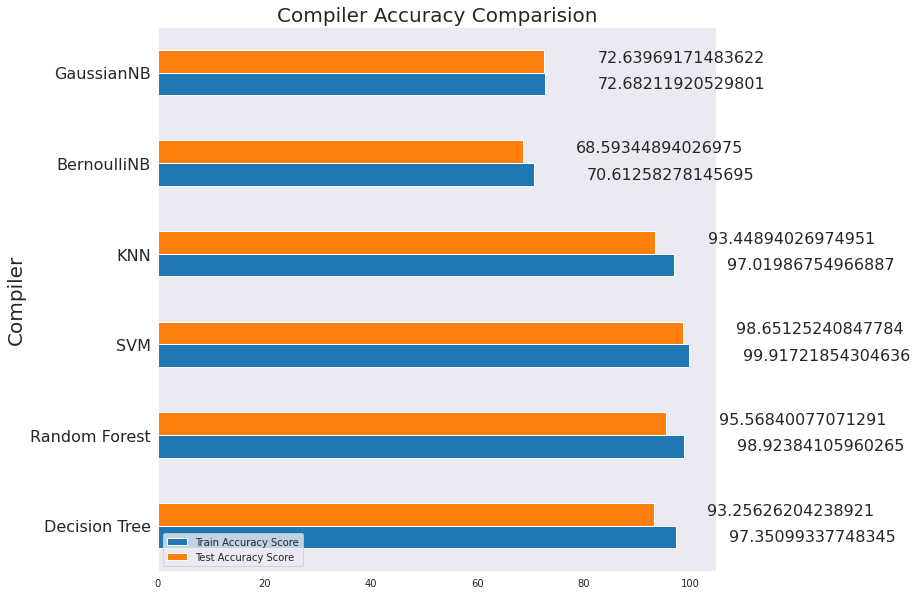

In [ ]:
import seaborn as sns
sns.set_style("dark")
ax = compiler_compare.plot.barh(x='Name', rot=0, figsize=(10, 10))
plt.yticks(size =16)
plt.legend(loc='lower left')
plt.ylabel("Compiler" , size =20)
plt.title("Compiler Accuracy Comparision", size = 20)
for index, value in enumerate(compiler_compare['Test Accuracy Score']):
    plt.text(value+10, index+.12, str(value),size=16)
for index, value in enumerate(compiler_compare['Train Accuracy Score']):
    plt.text(value+10, index-.17, str(value),size=16)